In [22]:
# regular versions of the keying implementations
# 
#
#
#
#

#IMPORTS
import numpy as np
import datetime, time
import sys
import cv2


#CHANGE TO FALSE TO NOT SHOW VIDEO
showvideo=True


#TEST VERSION
testing=False




#IMPORT VIDEO
#cap = cv2.VideoCapture("171003D_017_2K.mp4") 

#OR USE WEBCAM INPUT
cap = cv2.VideoCapture(0)



#SET BACKGROUND
#source:https://unsplash.com/photos/fJQSCxB18wE
alternate_background= cv2.imread("pink.png")
#alternate_background= cv2.imread("white.png")



#READ FIRST FRAME TO GET SHAPE AND CREATE ARRAYS
rval, frame = cap.read()
height,width, channels = frame.shape



saveframes=False
framecounter=0
distances2=np.zeros((height,width,3), np.uint8)
framenumber=0


#PARAMETERS AND ARRAYS ONLY USED FOR CHROMAV1B
counter=2
counterprev=1 
#initialize array for saving current mean of all frames
meanimage=np.zeros((height,width,3), np.uint8)
framecopy=np.zeros((height,width,3))
#make copy of meanimage for calculations outside of rgb color space
meanimagecopy=np.zeros((height,width,3))
#initialize meanimage with first frame
meanimage=frame



#KEYING METHODS-----------------------------------------------------------------------
#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------






#Chroma Keying Algorithm based on formula by Petro Vlahos 
#source: todo
def ChromaKeyVlahosv1(frame4, threshold):
    global framecounter
    global distances2
    
    
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    framecounter+=1
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
   
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    distances=np.zeros((width,height,1))
    
    distances[:,:,0]=np.abs(frame_b[:,:,0]- np.maximum(frame_g[:,:,0],frame_r[:,:,0]))
    distances=np.where(distances>threshold,0,1)

    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:,0])*frame4[:,:,0])+((1-distances[:,:,0])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:,0])*frame4[:,:,1])+((1-distances[:,:,0])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:,0])*frame4[:,:,2])+((1-distances[:,:,0])*alternate_background[:,:,2])

    return(resultimage)  

#----------------------------------------------------------------------------------
#Chroma Keying Algorithm based on formula by Petro Vlahos 
#source: todo
def ChromaKeyVlahosv2(frame4, alpha1, alpha2, threshold):
    global framecounter
    global distances2
    
    
    
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    framecounter+=1
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
   
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    distances=np.zeros((width,height,1))
    distances[:,:,:]=1.0 - alpha1*((frame_b[:,:,:]) - (alpha2*(frame_g[:,:,:])))
    
    distances=np.where(distances>threshold,0,1)

    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:,0])*frame4[:,:,0])+((1-distances[:,:,0])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:,0])*frame4[:,:,1])+((1-distances[:,:,0])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:,0])*frame4[:,:,2])+((1-distances[:,:,0])*alternate_background[:,:,2])

    return(resultimage)  
    
    
    
    
    
    



#Chroma Key Despill ------------------------------------------------------------------
#Chroma Keying Algorithm, that applies a despill filter on the frame before creating the matte
def ChromaKeyPlusDespill(frame4,threshold1,threshold2):
    
    global framecounter
    global distances2
    
    
    #shape of frame
    
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    framecounter+=1
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    #green RGB(0,255,0)
    colorbase=np.array([0,200,0])
    
    #convert base color to yuv
    chroma_key=cv2.cvtColor( np.uint8([[colorbase]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key[0]),float(chroma_key[1]),float(chroma_key[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    
    #apply kernel on distances
    distances=cv2.filter2D(distances,-1, kernel)
    
 
    
    trimap= np.where(((distances-threshold1)/(threshold2/threshold1))<=0,0, np.where(((distances-threshold1)/(threshold2/threshold1))>=1,1, 0.5))
    
    distances= np.where(((distances-threshold1)/(threshold2/threshold1))<=0,0, np.where(((distances-threshold1)/(threshold2/threshold1))>=1,1, 0.5))
    
    #distances2[:,:,0]=(trimap[:,:])*255
    #distances2[:,:,1]=(trimap[:,:])*255
    #distances2[:,:,2]=(trimap[:,:])*255
    
    #if (framecounter==framenumber and saveframes):
    #    cv2.imwrite("trimap.jpg", distances2)
        
    #distances2[:,:,0]=(distances[:,:])*255
    #distances2[:,:,1]=(distances[:,:])*255
    #distances2[:,:,2]=(distances[:,:])*255
        
    #if (framecounter==framenumber and saveframes):
    #   cv2.imwrite("mask.jpg", distances2)
    
    
    
    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])

    return(resultimage)   
    

#Chroma Key Despill Version 2 ------------------------------------------------------------------
#Chroma Keying Algorithm, that applies a despill filter on the frame before creating the matte
def ChromaKeyPlusDespillv2(frame4,threshold1,threshold2):
    global framecounter
    global distances2
    framecounter+=1
    
    
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    #green RGB(0,255,0)
    colorbase=np.array([0,200,0])
    
    #convert base color to yuv
    chroma_key=cv2.cvtColor( np.uint8([[colorbase]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key[0]),float(chroma_key[1]),float(chroma_key[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    
    #apply kernel on distances
    distances=cv2.filter2D(distances,-1, kernel)
    

    distances= np.where(distances<threshold1,0, np.where(distances<=threshold2,0.5, 1))
        
    distances2[:,:,0]=(distances[:,:])#*255
    distances2[:,:,1]=(distances[:,:])#*255
    distances2[:,:,2]=(distances[:,:])#*255
        
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("mask.jpg", distances2)
        
    frame4=DespillA(frame4,distances)
    
    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])

    return(resultimage)



#ALL DESPILL FILTERS


#Version 1: 
#If the green channel of a pixel is bigger than the red one, the red-channel-value replaces the green-value
def Despill1(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>frame_r).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,frame_r,frame4)
    return(frame4)

#Version 2:
#If the green channel of a pixel is bigger than the blue one, the blue-channel-value replaces the green-value
def Despill2(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>frame_b).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,frame_b,frame4)
    return(frame4)
    
#Version 3
#If the green channel of a pixel is bigger than the average between blue and red, then the average is used as the green-value
def Despill3(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    #3. despill version 3: average
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>((frame_r+frame_b)/2)).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    #apply despill on frame
    frame4=np.where(despill==1,((frame_r+frame_b)/2),frame4)
    return(frame4)

#Version4
#If the green channel of a pixel is bigger than the average between blue and red*2, then this value is used as the green-value
def Despill4(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>(((2*frame_r)+frame_b)/3)).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,(((2*frame_r)+frame_b)/3),frame4)
    return(frame4)

#Version5
#If the green channel of a pixel is bigger than the average between blue*2 and red, then this value is used as the green-value
def Despill5(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>((frame_r+(2*frame_b))/3)).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,((frame_r+(2*frame_b))/3),frame4)
    return(frame4)

# Version 6
# 
def DespillA(frame4,distances):
    key=255
    
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    #copy frame, so that calculations outside of uint8 can happen
    frame_copy=np.zeros((width,height,3))
    frame_copy[:,:,:]=frame4[:,:,:]
    
    #condition 1: green-tolerance<(red+blue)/2
    tolerance=60
    despill_c1=np.zeros((width,height,1))
    despill_c1[(frame_g-tolerance<((frame_r+frame_b)/2)).all(axis=2)]=1
    
    
    #condition 2: pixel has to be tranparent
    despill_c2=np.zeros((width,height,1))
    c2=np.where(distances==0.5,1,0)
    despill_c2[:,:,0]=c2[:,:]
    
    #apply filter on all pixels, that fulfill condition1 and 2
    despill=np.zeros((width,height,3))
    despill[:,:,0]=despill_c1[:,:,0]*despill_c2[:,:,0]
    despill[:,:,1]=despill_c1[:,:,0]*despill_c2[:,:,0]
    despill[:,:,2]=despill_c1[:,:,0]*despill_c2[:,:,0]
    
    #pixel_new= (1-despill)*frame_old + despill*(frame_old-key/2)*2
    frame_copy[:,:,1]=(1-despill[:,:,1])*frame_copy[:,:,1] + (despill[:,:,1])*(np.minimum(np.maximum((frame_copy[:,:,1]-(key/2)),0)*2,255))

    #adjust transparency (todo: make transition smoother)
    frame_copy=(1-despill)*frame_copy + despill*((frame_copy*0.5)+(alternate_background*0.5))
    
    #copy result back into frame4
    frame4=frame_copy
    return(frame4)








#Chroma Key 1a (yuv)----------------------------------------------------------------------------
#Chroma Key (yuv version)
def Chromav1a(frame4,threshold1,threshold2):
    
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    #green RGB(0,255,0)
    colorbase=np.array([0,200,0])
    
    #convert base color to yuv
    chroma_key=cv2.cvtColor( np.uint8([[colorbase]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    
    
    #frame4[:,:,:]=np.minimum(255,2*(np.maximum(0,frame4[:,:,:]-((1/2)*chroma_key))))
    
    
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key[0]),float(chroma_key[1]),float(chroma_key[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    
    #apply kernel on distances
    cv2.filter2D(distances,-1, kernel)
    
   
    #assign pixels with distances<threshold to foreground and >=threshold to foreground

    distances= np.where(distances<threshold1,0,1)
    #distances= np.where(((distances-threshold1)/(threshold2/threshold1))<=0,0, np.where(((distances-threshold1)/(threshold2/threshold1))>=1,1, 3*((distances-threshold1)/(threshold2/threshold1))**2- 2*((distances-threshold1)/(threshold2/threshold1))**3))

    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    
    return(resultimage)

#Chroma Key 1b ------------------------------------------------------------------------------------------------------------------------------------------------------------------
#todo desc

#updates counters after every loop
def counterplusone():
    global counter
    global counterprev
    counterprev+=1
    counter+=1

    
def updatemeanimage():
    global meanimagecopy
    meanimagecopy[:,:,:]=meanimage[:,:,:]#copy pixel-values for calculations outside of uint8
    framecopy[:,:,:]=frame4[:,:,:]#copy pixel-values for calculations outside of uint8
    meanimagecopy=(meanimagecopy*counterprev+framecopy)/counter #update meanimage
    meanimage[:,:,:]=meanimagecopy[:,:,:]#copy updated pixels back into meanimage
    counterplusone()#update counters


def Chromav1b(frame4,threshold1):
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    #make mask of current frame and of the mean of all previous frames
    mask1=makemask(frame4,threshold1)
    mask2=makemask(meanimage,threshold1)
    
    #combine masks
    mask3=mask1+mask2
    
    #distances=and(mask1,mask2)
    distances= np.where(mask3==2,1,0)
    
    #update meanimage for next loop
    updatemeanimage()
    
    #assign pixels with distances<threshold to foreground and >=threshold to foreground
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    
    return(resultimage)
    
    
def makemask(frame4,threshold1):
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    #green RGB(0,255,0)
    colorbase=np.array([0,255,0])
    
    #convert base color to yuv
    chroma_key=cv2.cvtColor( np.uint8([[colorbase]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key[0]),float(chroma_key[1]),float(chroma_key[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    #apply kernel on distances
    distances=cv2.filter2D(distances,-1, kernel)
    distances=np.where(distances<threshold1,0,1)
    return(distances)

















#Chroma Key 1c-----------------------------------------------------------------------------------


#Chroma Key 2-------------------------------------------------------------------------------------
#todo desc
def Chromav2(frame4,threshold1):
    
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    #convert every pixel in frame from rgb to ycrcb
    ycrcb = cv2.cvtColor(frame4, cv2.COLOR_RGB2YCrCb)
    
    #green RGB(0,255,0)
    colorbase=np.array([0,255,0])
    
    #convert base color to yuc
    chroma_key=cv2.cvtColor( np.uint8([[colorbase]] ), cv2.COLOR_RGB2YCrCb)[0][0]
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key[0]),float(chroma_key[1]),float(chroma_key[2])])
        
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy Cr and Cb chanel for calculating distance outside of uint8
    ycrcb_cr=np.zeros((width,height))
    ycrcb_cr[:,:]=ycrcb[:,:,1]
    ycrcb_cb=np.zeros((width,height))
    ycrcb_cb[:,:]=ycrcb[:,:,2]
    
    
    #calculate distances
    distances=((chroma_key2[1]-ycrcb_cr)**2+(chroma_key2[2]-ycrcb_cb)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9

    #apply kernel on distances
    cv2.filter2D(distances,-1, kernel)
    
    #assign pixels with distances<threshold to foreground and >=threshold to foreground
    distances= np.where(distances<threshold1,0,1)
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)




#Chroma Key 3
def Chromav3(frame4,threshold1):
    
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    #convert every pixel in frame from rgb to ycrcb
    hsv = cv2.cvtColor(frame4, cv2.COLOR_RGB2HSV)
    
    #green RGB(0,255,0)
    colorbase=np.array([0,255,0])
    
    #convert base color to yuc
    chroma_key=cv2.cvtColor( np.uint8([[colorbase]] ), cv2.COLOR_RGB2HSV)[0][0]
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key[0]),float(chroma_key[1]),float(chroma_key[2])])
        
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy Cr and Cb chanel for calculating distance outside of uint8
    hsv_s=np.zeros((width,height))
    hsv_s[:,:]=hsv[:,:,1]
    hsv_v=np.zeros((width,height))
    hsv_v[:,:]=hsv[:,:,2]
    
    
    #calculate distances
    distances=((chroma_key2[1]-hsv_s)**2+(chroma_key2[2]-hsv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9

    #apply kernel on distances
    cv2.filter2D(distances,-1, kernel)
    
    #assign pixels with distances<threshold to foreground and >=threshold to foreground
    distances= np.where(distances<threshold1,0,1)
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)

#Chroma Key 4 ---------------------------------------------------------------------------------------

#def ChromaKeyv4(frame4):
    


#Color Key----------------------------------------------------------------------------------------------------

def ColorKey(frame4,threshold1,threshold2):
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #green RGB(0,255,0)
    color_key=np.array([0,255,0])
    
    #make copy of chroma_key for calculations outside of uint8
    color_key2=np.array([float(color_key[0]),float(color_key[1]),float(color_key[2])])
        
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height)) 
    
    
    rgb_r=np.zeros((width,height))
    rgb_r[:,:]=frame4[:,:,0]
    rgb_g=np.zeros((width,height))
    rgb_g[:,:]=frame4[:,:,1]
    rgb_b=np.zeros((width,height))
    rgb_b[:,:]=frame4[:,:,2]
    
    
    #calculate distances
    distances=((color_key2[0]-rgb_r)**2+(color_key2[1]-rgb_g)**2+(color_key2[2]-rgb_b)**2)**(0.5)
        
    distances= np.where(distances<=threshold1,0, np.where(distances>=threshold2,1, 0.5))
    
    #distances2[:,:,0]=(distances[:,:])*255
    #distances2[:,:,1]=(distances[:,:])*255
    #distances2[:,:,2]=(distances[:,:])*255

    
    #if (framecounter==framenumber and saveframes):
    #    cv2.imwrite("trimap.jpg", distances2)
    
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)


#Color Key v2
def ColorKeyv2(frame4):
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #green RGB(0,255,0)
    color_key=np.array([0,255,0])
    
    #make copy of chroma_key for calculations outside of uint8
    color_key2=np.array([float(color_key[0]),float(color_key[1]),float(color_key[2])])
            
    #frame5=Despill3(frame4)
    
    rgb_r=np.zeros((width,height))
    rgb_r[:,:]=frame4[:,:,0]
    rgb_g=np.zeros((width,height))
    rgb_g[:,:]=frame4[:,:,1]
    rgb_b=np.zeros((width,height))
    rgb_b[:,:]=frame4[:,:,2]
    
    
    #calculate distances
    distances0=((color_key2[0]-rgb_r)**2+(color_key2[1]-rgb_g)**2+(color_key2[2]-rgb_b)**2)**(0.5)
    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height,1))
    distances[:,:,0]=distances0[:,:]
    #print(np.mean(distances0))
     
    distances=np.apply_along_axis(smoothstepv3,2,distances)
    
    #distances2[:,:,0]=(distances[:,:])*255
    #distances2[:,:,1]=(distances[:,:])*255
    #distances2[:,:,2]=(distances[:,:])*255
    
    
    #if (framecounter==framenumber and saveframes):
    #    cv2.imwrite("trimap.jpg", distances2)
    
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)






#Color Key v2
def ColorKeyv3(frame4):
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background0= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    color_key1=np.array([50,150,50])
    color_key2=np.array([150,255,150])
    
    distances = cv2.inRange(frame4, color_key1, color_key2)
    distances=1-distances
    
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)



#Luma Key 1------------------------------------------------------------------------------------
#source:  https://en.wikipedia.org/wiki/Smoothstep
def smoothstepv1(luminance):
    threshold1=100
    threshold2=180
    tolerance1=10
    tolerance2=10
    return (smoothstep(luminance[0],threshold1,threshold1+tolerance1)*(1- smoothstep(luminance[0],threshold2-tolerance2,threshold2)))

    
#source:  https://en.wikipedia.org/wiki/Smoothstep
def smoothstepv2(luminance):
    threshold1=100
    threshold2=180
    return smoothstep(luminance[0],threshold1,threshold2)

def smoothstep(x, xmin, xmax):
    smoothstep1=(x - xmin) / (xmax - xmin)
    if smoothstep1 <= 0:
        return 0
    elif smoothstep1 >= 1:
        return 1
    else:
        return 3*smoothstep1**2- 2*smoothstep1**3

def smoothstepv3(distance):
    threshold1=160
    threshold2=180
    
    if distance[0]<= threshold1:
        return 0.1
    elif distance[0]>=threshold2:
        return 1
    else:
        return (0.8*((distance[0]-threshold1)/(threshold2-threshold1)))
    
def LumaKey(frame4,threshold1,threshold2,tolerance1,tolerance2):
    
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert rgb value to luminance
    luma_converter=np.array([0.2989, 0.5870, 0.1140])
    luminance=np.zeros((width,height,1))
    luminance[:,:,0]=frame4[:,:,0]*luma_converter[0]+frame4[:,:,1]*luma_converter[1]+frame4[:,:,2]*luma_converter[2]
    
    #mask
    mask=np.apply_along_axis(smoothstepv1,2,luminance)
    #mask=abs(mask-1)
    #OR
    #mask=np.apply_along_axis(smoothstepv2,2,luminance)
    
    #assign resulting image to foreground or background
    resultimage[:,:,0]=(1-mask[:,:])*frame4[:,:,0]+(mask[:,:])*alternate_background[:,:,0]
    resultimage[:,:,1]=(1-mask[:,:])*frame4[:,:,1]+(mask[:,:])*alternate_background[:,:,1]
    resultimage[:,:,2]=(1-mask[:,:])*frame4[:,:,2]+(mask[:,:])*alternate_background[:,:,2]
    return(resultimage)


#Luma Key 2 ----------------------------------------------------------------------------------


def LumaKeyv2(frame4,threshold1):

    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    luminance=np.zeros((width,height,1))
    luminance[:,:,0]=yuv[:,:,0]
    
    mask=np.where((0<luminance),np.where((threshold1>luminance),1,0),1)
    
    #assign resulting image to foreground or background
    resultimage[:,:,0]=(mask[:,:,0])*frame4[:,:,0]+(1-mask[:,:,0])*alternate_background[:,:,0]
    resultimage[:,:,1]=(mask[:,:,0])*frame4[:,:,1]+(1-mask[:,:,0])*alternate_background[:,:,1]
    resultimage[:,:,2]=(mask[:,:,0])*frame4[:,:,2]+(1-mask[:,:,0])*alternate_background[:,:,2]


    return(resultimage)

#--------------------------------------------------------------------------------------------------------------



    
def LumaKeyv3(frame4,threshold1):#Schultz Version
    #shape of frame
    width, height, channels = frame4.shape
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    alternate_background= alternate_background0[0:width,0:height]
    
    luma_key=0.5*255
    tolerance=0.2*255
    smoothness=0.1*255
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert every pixel in frame from rgb to hls
    hls = cv2.cvtColor(frame4, cv2.COLOR_RGB2HLS)
    
    luminance=np.zeros((width,height,1))
    luminance[:,:,0]=hls[:,:,1]
    #print(hls)
    #print(luminance)
    #luminance=luminance/255
    mask=np.apply_along_axis(smoothstepv2,2,luminance)
    mask=np.where((10<luminance),np.where((threshold1>luminance),1,0),0)
    
    
    #assign resulting image to foreground or background
    resultimage[:,:,0]=(mask[:,:,0])*frame4[:,:,0]+(1-mask[:,:,0])*alternate_background[:,:,0]
    resultimage[:,:,1]=(mask[:,:,0])*frame4[:,:,1]+(1-mask[:,:,0])*alternate_background[:,:,1]
    resultimage[:,:,2]=(mask[:,:,0])*frame4[:,:,2]+(1-mask[:,:,0])*alternate_background[:,:,2]


    return(resultimage)



while(showvideo):
    #read current frame
    rval, frame4 = cap.read()
    
    if (testing==True):
        frame4= cv2.imread("tests/testpicture1greenbg.png")
        frame4= cv2.resize(frame4, (640,480))
    
    #shape of frame
    width, height, channels = frame4.shape
    
    alternate_background= alternate_background[0:width,0:height]
    
    #make empty mask with same size as frame
    mask= np.zeros((width,height), np.uint8)
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    
    #safe frame at position of counter
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("originalframe.jpg", frame4)
    
    cv2.imshow('original',frame4)
    #apply filter
    #frame4=ChromaKeyVlahosv1(frame4,200)
    #frame4=ChromaKeyVlahosv2(frame4,1.5,0.5,0)
    #frame4=ChromaKeyPlusDespill(frame4,95,350)
    #frame4=ChromaKeyPlusDespillv2(frame4,95,105)
    #frame4=Chromav1a(frame4,100,160)
    #frame4=Chromav1b(frame4,120)
    #frame4=Chromav2(frame4,120)
    #frame4=Chromav3(frame4,150)
    #frame4=ColorKey(frame4,189,200)
    #frame4=ColorKeyv2(frame4)
    frame4=ColorKeyv3(frame4)
    #frame4=LumaKey(frame4,100,180,10,10)
    #frame4=LumaKeyv2(frame4,220)
    #frame4=LumaKeyv3(frame4,245)
    
    #only for tests
    #frame4=Despill1(frame4)
    #frame4=Despill2(frame4)
    #frame4=Despill3(frame4)
    #frame4=Despill4(frame4)
    #frame4=Despill5(frame4)
    #frame4=DespillA(frame4)
    
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("resultframe.jpg", frame4)
        
    #apply mask on frame
    resultimage[:,:,:]=(frame4[:,:,:])
    
    #return result of current frame
    cv2.imshow('resultimage',resultimage)
    
    #close window if esc is pressed
    key = cv2.waitKey(1)
    if key == 27: 
        break

cv2.destroyAllWindows()

In [3]:
# alternative keying implementations, where color_key is manually selected from screen
# select by hovering over background-color and press ^-Key
#
#
#

#IMPORTS
from pynput import mouse
import numpy as np
import datetime, time
import sys
import cv2
import PIL.ImageGrab
import pyautogui
from pynput.mouse import Listener


#CHANGE TO FALSE TO NOT SHOW VIDEO
showvideo=True


#TEST VERSION
testing=False


#green RGB(0,255,0)
color_key=np.array([0,255,0])


#IMPORT VIDEO
#cap = cv2.VideoCapture("171003D_017_2K.mp4") 

#OR USE WEBCAM INPUT
cap = cv2.VideoCapture(0)



#SET BACKGROUND
#source:https://unsplash.com/photos/fJQSCxB18wE
alternate_background= cv2.imread("pink.png")
#alternate_background= cv2.imread("white.png")



#READ FIRST FRAME TO GET SHAPE AND CREATE ARRAYS
rval, frame = cap.read()
height,width, channels = frame.shape



saveframes=False
framecounter=0
distances2=np.zeros((height,width,3), np.uint8)
framenumber=0


#PARAMETERS AND ARRAYS ONLY USED FOR CHROMAV1B
counter=2
counterprev=1 
#initialize array for saving current mean of all frames
meanimage=np.zeros((height,width,3), np.uint8)
framecopy=np.zeros((height,width,3))
#make copy of meanimage for calculations outside of rgb color space
meanimagecopy=np.zeros((height,width,3))
#initialize meanimage with first frame
meanimage=frame



#KEYING METHODS-----------------------------------------------------------------------
#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------






#Chroma Keying Algorithm based on formula by Petro Vlahos 
#source: todo
def ChromaKeyVlahosv1(frame4, threshold):
    global framecounter
    global distances2
    
    framecounter+=1
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
   
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    distances=np.zeros((width,height,1))
    
    distances[:,:,0]=np.abs(frame_b[:,:,0]- np.maximum(frame_g[:,:,0],frame_r[:,:,0]))
    distances=np.where(distances>threshold,0,1)

    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:,0])*frame4[:,:,0])+((1-distances[:,:,0])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:,0])*frame4[:,:,1])+((1-distances[:,:,0])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:,0])*frame4[:,:,2])+((1-distances[:,:,0])*alternate_background[:,:,2])

    return(resultimage)  

#----------------------------------------------------------------------------------
#Chroma Keying Algorithm based on formula by Petro Vlahos 
#source: todo
def ChromaKeyVlahosv2(frame4, alpha1, alpha2, threshold):
    global framecounter
    global distances2
    
    framecounter+=1
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
   
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    distances=np.zeros((width,height,1))
    distances[:,:,:]=1.0 - alpha1*((frame_b[:,:,:]) - (alpha2*(frame_g[:,:,:])))
    
    distances=np.where(distances>threshold,0,1)

    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:,0])*frame4[:,:,0])+((1-distances[:,:,0])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:,0])*frame4[:,:,1])+((1-distances[:,:,0])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:,0])*frame4[:,:,2])+((1-distances[:,:,0])*alternate_background[:,:,2])

    return(resultimage)  
    
    
    
    
    
    



#Chroma Key Despill ------------------------------------------------------------------
#Chroma Keying Algorithm, that applies a despill filter on the frame before creating the matte
def ChromaKeyPlusDespill(frame4,threshold1,threshold2):

    global color_key    
    
    key1 = cv2.waitKey(10)
    if key1 == 94: 
        x, y = pyautogui.position()
        grab_color= PIL.ImageGrab.grab().load()[x,y]
        color_key=np.array([grab_color[0],grab_color[1],grab_color[2]])

    global framecounter
    global distances2
    framecounter+=1
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    frame4=Despill3(frame4)
    
    #convert base color to yuv
    chroma_key1=cv2.cvtColor( np.uint8([[color_key]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key1[0]),float(chroma_key1[1]),float(chroma_key1[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    
    #apply kernel on distances
    distances=cv2.filter2D(distances,-1, kernel)
    
 
    
    trimap= np.where(((distances-threshold1)/(threshold2/threshold1))<=0,0, np.where(((distances-threshold1)/(threshold2/threshold1))>=1,1, 0.5))
    
    distances= np.where(((distances-threshold1)/(threshold2/threshold1))<=0,0, np.where(((distances-threshold1)/(threshold2/threshold1))>=1,1, 0.5))
    
    #distances2[:,:,0]=(trimap[:,:])*255
    #distances2[:,:,1]=(trimap[:,:])*255
    #distances2[:,:,2]=(trimap[:,:])*255
    
    #if (framecounter==framenumber and saveframes):
    #    cv2.imwrite("trimap.jpg", distances2)
        
    distances2[:,:,0]=(distances[:,:])*255
    distances2[:,:,1]=(distances[:,:])*255
    distances2[:,:,2]=(distances[:,:])*255
        
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("mask.jpg", distances2)
    
    
    
    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])

    return(resultimage)   
    

#Chroma Key Despill Version 2 ------------------------------------------------------------------
#Chroma Keying Algorithm, that applies a despill filter on the frame before creating the matte
def ChromaKeyPlusDespillv2(frame4,threshold1,threshold2):
    global color_key    
    
    key1 = cv2.waitKey(1)
    if key1 == 94: 
        x, y = pyautogui.position()
        grab_color= PIL.ImageGrab.grab().load()[x,y]
        color_key=np.array([grab_color[0],grab_color[1],grab_color[2]])
    
    
    global framecounter
    global distances2
    framecounter+=1
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    frame4=Despill3(frame4)
    
    #convert base color to yuv
    chroma_key1=cv2.cvtColor( np.uint8([[color_key]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key1[0]),float(chroma_key1[1]),float(chroma_key1[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    
    #apply kernel on distances
    distances=cv2.filter2D(distances,-1, kernel)
    

    distances= np.where(distances<threshold1,0, np.where(distances<=threshold2,0.5, 1))
        
    distances2[:,:,0]=(distances[:,:])#*255
    distances2[:,:,1]=(distances[:,:])#*255
    distances2[:,:,2]=(distances[:,:])#*255
        
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("mask.jpg", distances2)
        
    frame4=DespillA(frame4,distances)
    
    #apply mask on frame
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])

    return(resultimage)



#ALL DESPILL FILTERS


#Version 1: 
#If the green channel of a pixel is bigger than the red one, the red-channel-value replaces the green-value
def Despill1(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>frame_r).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,frame_r,frame4)
    return(frame4)

#Version 2:
#If the green channel of a pixel is bigger than the blue one, the blue-channel-value replaces the green-value
def Despill2(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>frame_b).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,frame_b,frame4)
    return(frame4)
    
#Version 3
#If the green channel of a pixel is bigger than the average between blue and red, then the average is used as the green-value
def Despill3(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    #3. despill version 3: average
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>((frame_r+frame_b)/2)).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    #apply despill on frame
    frame4=np.where(despill==1,((frame_r+frame_b)/2),frame4)
    return(frame4)

#Version4
#If the green channel of a pixel is bigger than the average between blue and red*2, then this value is used as the green-value
def Despill4(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>(((2*frame_r)+frame_b)/3)).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,(((2*frame_r)+frame_b)/3),frame4)
    return(frame4)

#Version5
#If the green channel of a pixel is bigger than the average between blue*2 and red, then this value is used as the green-value
def Despill5(frame4):
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    despill_g=np.zeros((width,height,1))
    despill_g[(frame_g>((frame_r+(2*frame_b))/3)).all(axis=2)]=1
    despill=np.zeros((width,height,3))
    despill[:,:,1]=despill_g[:,:,0]
    frame4=np.where(despill==1,((frame_r+(2*frame_b))/3),frame4)
    return(frame4)

# Version 6
# 
def DespillA(frame4,distances):
    key=255
    
    #seperate color chanels
    frame_r=np.zeros((width,height,1))
    frame_r[:,:,0]=frame4[:,:,0]
    frame_g=np.zeros((width,height,1))
    frame_g[:,:,0]=frame4[:,:,1]
    frame_b=np.zeros((width,height,1))
    frame_b[:,:,0]=frame4[:,:,2]
    
    #copy frame, so that calculations outside of uint8 can happen
    frame_copy=np.zeros((width,height,3))
    frame_copy[:,:,:]=frame4[:,:,:]
    
    #condition 1: green-tolerance<(red+blue)/2
    tolerance=60
    despill_c1=np.zeros((width,height,1))
    despill_c1[(frame_g-tolerance<((frame_r+frame_b)/2)).all(axis=2)]=1
    
    
    #condition 2: pixel has to be tranparent
    despill_c2=np.zeros((width,height,1))
    c2=np.where(distances==0.5,1,0)
    despill_c2[:,:,0]=c2[:,:]
    
    #apply filter on all pixels, that fulfill condition1 and 2
    despill=np.zeros((width,height,3))
    despill[:,:,0]=despill_c1[:,:,0]*despill_c2[:,:,0]
    despill[:,:,1]=despill_c1[:,:,0]*despill_c2[:,:,0]
    despill[:,:,2]=despill_c1[:,:,0]*despill_c2[:,:,0]
    
    #pixel_new= (1-despill)*frame_old + despill*(frame_old-key/2)*2
    frame_copy[:,:,1]=(1-despill[:,:,1])*frame_copy[:,:,1] + (despill[:,:,1])*(np.minimum(np.maximum((frame_copy[:,:,1]-(key/2)),0)*2,255))

    #adjust transparency (todo: make transition smoother)
    frame_copy=(1-despill)*frame_copy + despill*((frame_copy*0.5)+(alternate_background*0.5))
    
    #copy result back into frame4
    frame4=frame_copy
    return(frame4)








#Chroma Key 1a (yuv)----------------------------------------------------------------------------
#Chroma Key (yuv version)
def Chromav1a(frame4,threshold1,threshold2):
    global color_key    
    
    key1 = cv2.waitKey(10)
    if key1 == 94: 
        x, y = pyautogui.position()
        grab_color= PIL.ImageGrab.grab().load()[x,y]
        color_key=np.array([grab_color[0],grab_color[1],grab_color[2]])
    
    
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    
    
    #convert base color to yuv
    chroma_key1=cv2.cvtColor( np.uint8([[chroma_key]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key1[0]),float(chroma_key1[1]),float(chroma_key1[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    
    #apply kernel on distances
    cv2.filter2D(distances,-1, kernel)
    
   
    #assign pixels with distances<threshold to foreground and >=threshold to foreground

    distances= np.where(distances<threshold1,0,1)
    #distances= np.where(((distances-threshold1)/(threshold2/threshold1))<=0,0, np.where(((distances-threshold1)/(threshold2/threshold1))>=1,1, 3*((distances-threshold1)/(threshold2/threshold1))**2- 2*((distances-threshold1)/(threshold2/threshold1))**3))

    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    
    return(resultimage)

#Chroma Key 1b ------------------------------------------------------------------------------------------------------------------------------------------------------------------
#todo desc

#updates counters after every loop
def counterplusone():
    global counter
    global counterprev
    counterprev+=1
    counter+=1

    
def updatemeanimage():
    global meanimagecopy
    meanimagecopy[:,:,:]=meanimage[:,:,:]#copy pixel-values for calculations outside of uint8
    framecopy[:,:,:]=frame4[:,:,:]#copy pixel-values for calculations outside of uint8
    meanimagecopy=(meanimagecopy*counterprev+framecopy)/counter #update meanimage
    meanimage[:,:,:]=meanimagecopy[:,:,:]#copy updated pixels back into meanimage
    counterplusone()#update counters


def Chromav1b(frame4,threshold1):
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    #make mask of current frame and of the mean of all previous frames
    mask1=makemask(frame4,threshold1)
    mask2=makemask(meanimage,threshold1)
    
    #combine masks
    mask3=mask1+mask2
    
    #distances=and(mask1,mask2)
    distances= np.where(mask3==2,1,0)
    
    #update meanimage for next loop
    updatemeanimage()
    
    #assign pixels with distances<threshold to foreground and >=threshold to foreground
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    
    return(resultimage)
    
    
def makemask(frame4,threshold1):
    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    #green RGB(0,255,0)
    colorbase=np.array([0,255,0])
    
    #convert base color to yuv
    chroma_key=cv2.cvtColor( np.uint8([[colorbase]] ), cv2.COLOR_RGB2YUV)[0][0]
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key[0]),float(chroma_key[1]),float(chroma_key[2])])

    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy u and v chanel for calculating distance outside of uint8
    yuv_u=np.zeros((width,height))
    yuv_u[:,:]=yuv[:,:,1]
    yuv_v=np.zeros((width,height))
    yuv_v[:,:]=yuv[:,:,2]
    
    #calculate distances
    distances=((chroma_key2[1]-yuv_u)**2+(chroma_key2[2]-yuv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9
    
    #apply kernel on distances
    distances=cv2.filter2D(distances,-1, kernel)
    distances=np.where(distances<threshold1,0,1)
    return(distances)

















#Chroma Key 1c-----------------------------------------------------------------------------------


#Chroma Key 2-------------------------------------------------------------------------------------
#todo desc
def Chromav2(frame4,threshold1):
    global color_key    
    
    key1 = cv2.waitKey(10)
    if key1 == 94: 
        x, y = pyautogui.position()
        grab_color= PIL.ImageGrab.grab().load()[x,y]
        color_key=np.array([grab_color[0],grab_color[1],grab_color[2]])
        
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    #convert every pixel in frame from rgb to ycrcb
    ycrcb = cv2.cvtColor(frame4, cv2.COLOR_RGB2YCrCb)
    
    
    
    #convert base color to yuc
    chroma_key1=cv2.cvtColor( np.uint8([[color_key]] ), cv2.COLOR_RGB2YCrCb)[0][0]
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key1[0]),float(chroma_key1[1]),float(chroma_key1[2])])
        
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy Cr and Cb chanel for calculating distance outside of uint8
    ycrcb_cr=np.zeros((width,height))
    ycrcb_cr[:,:]=ycrcb[:,:,1]
    ycrcb_cb=np.zeros((width,height))
    ycrcb_cb[:,:]=ycrcb[:,:,2]
    
    
    #calculate distances
    distances=((chroma_key2[1]-ycrcb_cr)**2+(chroma_key2[2]-ycrcb_cb)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9

    #apply kernel on distances
    cv2.filter2D(distances,-1, kernel)
    
    #assign pixels with distances<threshold to foreground and >=threshold to foreground
    distances= np.where(distances<threshold1,0,1)
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)




#Chroma Key 3
def Chromav3(frame4,threshold1):
    global color_key    
    
    key1 = cv2.waitKey(10)
    if key1 == 94: 
        x, y = pyautogui.position()
        grab_color= PIL.ImageGrab.grab().load()[x,y]
        color_key=np.array([grab_color[0],grab_color[1],grab_color[2]])
        
        
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    #convert every pixel in frame from rgb to ycrcb
    hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    
    
    
    #convert base color to yuc
    chroma_key1=cv2.cvtColor( np.uint8([[color_key]] ), cv2.COLOR_RGB2HSV)[0][0]
    
    #make copy of chroma_key for calculations outside of uint8
    chroma_key2=np.array([float(chroma_key1[0]),float(chroma_key1[1]),float(chroma_key1[2])])
        
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height))
    
    #copy Cr and Cb chanel for calculating distance outside of uint8
    hsv_s=np.zeros((width,height))
    hsv_s[:,:]=hsv[:,:,1]
    hsv_v=np.zeros((width,height))
    hsv_v[:,:]=hsv[:,:,2]
    
    
    #calculate distances
    distances=((chroma_key2[1]-hsv_s)**2+(chroma_key2[2]-hsv_v)**2)**(0.5)
       
    #kernel size
    pixel=5
    pixel_h=3
    
    #fill kernel     (kernel=np.array([[2,0,0,0,2],[0,0,1,0,0],[2,0,0,0,2]])/9)
    kernel=np.zeros((pixel,pixel_h))     
    kernel[0,0],kernel[pixel-1,0],kernel[pixel-1,pixel_h-1],kernel[0,pixel_h-1]=2/9,2/9,2/9,2/9
    kernel[int((pixel-1)/2),int((pixel_h-1)/2)]=1/9

    #apply kernel on distances
    cv2.filter2D(distances,-1, kernel)
    
    #assign pixels with distances<threshold to foreground and >=threshold to foreground
    distances= np.where(distances<threshold1,0,1)
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)

#Chroma Key 4 ---------------------------------------------------------------------------------------

#def ChromaKeyv4(frame4):
    


#Color Key----------------------------------------------------------------------------------------------------

def ColorKey(frame4,threshold1,threshold2):
    resultimage= np.zeros((width,height,3), np.uint8)

    global color_key    
    
    key1 = cv2.waitKey(10)
    if key1 == 94: 
        x, y = pyautogui.position()
        grab_color= PIL.ImageGrab.grab().load()[x,y]
        color_key=np.array([grab_color[0],grab_color[1],grab_color[2]])
    
    #make copy of chroma_key for calculations outside of uint8
    color_key2=np.array([float(color_key[0]),float(color_key[1]),float(color_key[2])])
        
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height)) 
    
    
    rgb_r=np.zeros((width,height))
    rgb_r[:,:]=frame4[:,:,0]
    rgb_g=np.zeros((width,height))
    rgb_g[:,:]=frame4[:,:,1]
    rgb_b=np.zeros((width,height))
    rgb_b[:,:]=frame4[:,:,2]
    
    
    #calculate distances
    distances=((color_key2[0]-rgb_r)**2+(color_key2[1]-rgb_g)**2+(color_key2[2]-rgb_b)**2)**(0.5)
        
    distances= np.where(distances<=threshold1,0, np.where(distances>=threshold2,1, 0.5))
    
    distances2[:,:,0]=(distances[:,:])*255
    distances2[:,:,1]=(distances[:,:])*255
    distances2[:,:,2]=(distances[:,:])*255
    
    
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("trimap.jpg", distances2)
    
    resultimage[:,:,0]=((distances[:,:])*frame4[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame4[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame4[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)


#Color Key v2
def ColorKeyv2(frame4):
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    global color_key    
    
    key1 = cv2.waitKey(10)
    if key1 == 94: 
        x, y = pyautogui.position()
        grab_color= PIL.ImageGrab.grab().load()[x,y]
        color_key=np.array([grab_color[0],grab_color[1],grab_color[2]])
    
    #make copy of chroma_key for calculations outside of uint8
    color_key2=np.array([float(color_key[0]),float(color_key[1]),float(color_key[2])])
            
    frame5=Despill3(frame4)
    
    rgb_r=np.zeros((width,height))
    rgb_r[:,:]=frame4[:,:,0]
    rgb_g=np.zeros((width,height))
    rgb_g[:,:]=frame4[:,:,1]
    rgb_b=np.zeros((width,height))
    rgb_b[:,:]=frame4[:,:,2]
    
    
    #calculate distances
    distances0=((color_key2[0]-rgb_r)**2+(color_key2[1]-rgb_g)**2+(color_key2[2]-rgb_b)**2)**(0.5)
    
    #array that saves the euclidean distance between all pixels in current frame and chroma key
    distances=np.zeros((width,height,1))
    distances[:,:,0]=distances0[:,:]
    #print(np.mean(distances0))
     
    distances=np.apply_along_axis(smoothstepv3,2,distances)
    
    distances2[:,:,0]=(distances[:,:])*255
    distances2[:,:,1]=(distances[:,:])*255
    distances2[:,:,2]=(distances[:,:])*255
    
    
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("trimap.jpg", distances2)
    
    resultimage[:,:,0]=((distances[:,:])*frame5[:,:,0])+((1-distances[:,:])*alternate_background[:,:,0])
    resultimage[:,:,1]=((distances[:,:])*frame5[:,:,1])+((1-distances[:,:])*alternate_background[:,:,1])
    resultimage[:,:,2]=((distances[:,:])*frame5[:,:,2])+((1-distances[:,:])*alternate_background[:,:,2])
    return(resultimage)

#Luma Key 1------------------------------------------------------------------------------------
#source:  https://en.wikipedia.org/wiki/Smoothstep
def smoothstepv1(luminance):
    threshold1=100
    threshold2=180
    tolerance1=10
    tolerance2=10
    return (smoothstep(luminance[0],threshold1,threshold1+tolerance1)*(1- smoothstep(luminance[0],threshold2-tolerance2,threshold2)))

    
#source:  https://en.wikipedia.org/wiki/Smoothstep
def smoothstepv2(luminance):
    threshold1=100
    threshold2=180
    return smoothstep(luminance[0],threshold1,threshold2)

def smoothstep(x, xmin, xmax):
    smoothstep1=(x - xmin) / (xmax - xmin)
    if smoothstep1 <= 0:
        return 0
    elif smoothstep1 >= 1:
        return 1
    else:
        return 3*smoothstep1**2- 2*smoothstep1**3

def smoothstepv3(distance):
    threshold1=160
    threshold2=180
    
    if distance[0]<= threshold1:
        return 0.1
    elif distance[0]>=threshold2:
        return 1
    else:
        return (0.8*((distance[0]-threshold1)/(threshold2-threshold1)))
    
def LumaKey(frame4,threshold1,threshold2,tolerance1,tolerance2):
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert rgb value to luminance
    luma_converter=np.array([0.2989, 0.5870, 0.1140])
    luminance=np.zeros((width,height,1))
    luminance[:,:,0]=frame4[:,:,0]*luma_converter[0]+frame4[:,:,1]*luma_converter[1]+frame4[:,:,2]*luma_converter[2]
    
    #mask
    mask=np.apply_along_axis(smoothstepv1,2,luminance)
    #mask=abs(mask-1)
    #OR
    #mask=np.apply_along_axis(smoothstepv2,2,luminance)
    
    #assign resulting image to foreground or background
    resultimage[:,:,0]=(1-mask[:,:])*frame4[:,:,0]+(mask[:,:])*alternate_background[:,:,0]
    resultimage[:,:,1]=(1-mask[:,:])*frame4[:,:,1]+(mask[:,:])*alternate_background[:,:,1]
    resultimage[:,:,2]=(1-mask[:,:])*frame4[:,:,2]+(mask[:,:])*alternate_background[:,:,2]
    return(resultimage)


#Luma Key 2 ----------------------------------------------------------------------------------


def LumaKeyv2(frame4,threshold1):


    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert every pixel in frame from rgb to yuv
    yuv = cv2.cvtColor(frame4, cv2.COLOR_RGB2YUV)
    
    luminance=np.zeros((width,height,1))
    luminance[:,:,0]=yuv[:,:,0]
    
    mask=np.where((0<luminance),np.where((threshold1>luminance),1,0),1)
    
    #assign resulting image to foreground or background
    resultimage[:,:,0]=(mask[:,:,0])*frame4[:,:,0]+(1-mask[:,:,0])*alternate_background[:,:,0]
    resultimage[:,:,1]=(mask[:,:,0])*frame4[:,:,1]+(1-mask[:,:,0])*alternate_background[:,:,1]
    resultimage[:,:,2]=(mask[:,:,0])*frame4[:,:,2]+(1-mask[:,:,0])*alternate_background[:,:,2]


    return(resultimage)

#--------------------------------------------------------------------------------------------------------------



    
def LumaKeyv3(frame4,threshold1):#Schultz Version

    luma_key=0.5*255
    tolerance=0.2*255
    smoothness=0.1*255
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)

    #convert every pixel in frame from rgb to hls
    hls = cv2.cvtColor(frame4, cv2.COLOR_RGB2HLS)
    
    luminance=np.zeros((width,height,1))
    luminance[:,:,0]=hls[:,:,1]
    #print(hls)
    #print(luminance)
    #luminance=luminance/255
    mask=np.apply_along_axis(smoothstepv2,2,luminance)
    mask=np.where((10<luminance),np.where((threshold1>luminance),1,0),0)
    
    
    #assign resulting image to foreground or background
    resultimage[:,:,0]=(mask[:,:,0])*frame4[:,:,0]+(1-mask[:,:,0])*alternate_background[:,:,0]
    resultimage[:,:,1]=(mask[:,:,0])*frame4[:,:,1]+(1-mask[:,:,0])*alternate_background[:,:,1]
    resultimage[:,:,2]=(mask[:,:,0])*frame4[:,:,2]+(1-mask[:,:,0])*alternate_background[:,:,2]


    return(resultimage)



while(showvideo):
    #read current frame
    rval, frame4 = cap.read()
    
    if (testing==True):
        frame4= cv2.imread("tests/testpicture1bluebg.png")
        frame4= cv2.resize(frame4, (640,480))
    
    #shape of frame
    width, height, channels = frame4.shape
    
    alternate_background= alternate_background[0:width,0:height]
    
    #make empty mask with same size as frame
    mask= np.zeros((width,height), np.uint8)
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    
    #safe frame at position of counter
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("originalframe.jpg", frame4)
    
    cv2.imshow('original',frame4)
    #apply filter
    #frame4=ChromaKeyVlahosv1(frame4,200)
    #frame4=ChromaKeyVlahosv2(frame4,1.5,0.5,0)
    frame4=ChromaKeyPlusDespill(frame4,95,350,)
    #frame4=ChromaKeyPlusDespillv2(frame4,95,105)
    #frame4=Chromav1a(frame4,100,160)
    #frame4=Chromav1b(frame4,120)
    #frame4=Chromav2(frame4,120)
    #frame4=Chromav3(frame4,150)
    #frame4=ColorKey(frame4,189,200)
    #frame4=ColorKeyv2(frame4)
    #frame4=LumaKey(frame4,100,180,10,10)
    #frame4=LumaKeyv2(frame4,220)
    #frame4=LumaKeyv3(frame4,245)
    
    #only for tests
    #frame4=Despill1(frame4)
    #frame4=Despill2(frame4)
    #frame4=Despill3(frame4)
    #frame4=Despill4(frame4)
    #frame4=Despill5(frame4)
    #frame4=DespillA(frame4)
    
    if (framecounter==framenumber and saveframes):
        cv2.imwrite("resultframe.jpg", frame4)
        
    #apply mask on frame
    resultimage[:,:,:]=(frame4[:,:,:])
    
    #return result of current frame
    cv2.imshow('resultimage',resultimage)
    
    #close window if esc is pressed
    key = cv2.waitKey(1)
    if key == 27: 
        break

cv2.destroyAllWindows()

ChromaKeyPlusDespillTest :
Using the  ChromaKeyPlusDespillTest  method on picture 1 results in an average pixel difference to the ideal result of 3.03 and  86.35 % pixels that could be keyed correctly
Using the  ChromaKeyPlusDespillTest  method on picture 2 results in an average pixel difference to the ideal result of 2.18 and  95.77 % pixels that could be keyed correctly
Using the  ChromaKeyPlusDespillTest  method on picture 3 results in an average pixel difference to the ideal result of 58.68 and  46.61 % pixels that could be keyed correctly
Using the  ChromaKeyPlusDespillTest  method on picture 4 results in an average pixel difference to the ideal result of 0.96 and  95.12 % pixels that could be keyed correctly


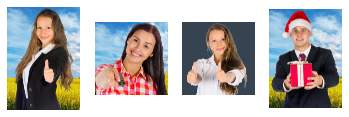

ChromaKeyPlusDespillv2Test :
Using the  ChromaKeyPlusDespillv2Test  method on picture 1 results in an average pixel difference to the ideal result of 3.03 and  86.35 % pixels that could be keyed correctly
Using the  ChromaKeyPlusDespillv2Test  method on picture 2 results in an average pixel difference to the ideal result of 2.18 and  95.77 % pixels that could be keyed correctly
Using the  ChromaKeyPlusDespillv2Test  method on picture 3 results in an average pixel difference to the ideal result of 58.68 and  46.61 % pixels that could be keyed correctly
Using the  ChromaKeyPlusDespillv2Test  method on picture 4 results in an average pixel difference to the ideal result of 0.96 and  95.12 % pixels that could be keyed correctly


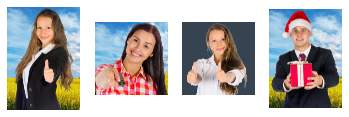

Chromav1aTest :


NameError: name 'chroma_key' is not defined

In [5]:
#compare performance of all keying methods that use green-screen by testing four pictures
#
# picture sources:
# https://www.publicdomainpictures.net/en/view-image.php?image=283138&picture=businesswoman-with-thumbs-up
# https://www.publicdomainpictures.net/en/view-image.php?image=363288&picture=woman-with-a-remote-control
# https://www.publicdomainpictures.net/en/view-image.php?image=283134&picture=businesswoman-with-thumbs-up
# https://www.publicdomainpictures.net/en/view-image.php?image=309804&picture=christmas-businessman
#
# background: 
# https://unsplash.com/photos/fJQSCxB18wE


import numpy as np
import datetime, time
import sys
import cv2
import matplotlib.pyplot as plt
import dis



#load test-images and ideal results
original1 = cv2.imread("tests/testpicture1greenbg.png")
result1 = cv2.imread("tests/testpicture1result.png")

original2 = cv2.imread("tests/testpicture2greenbg.png")
result2 = cv2.imread("tests/testpicture2result.png")

original3 = cv2.imread("tests/testpicture3greenbg.png")
result3 = cv2.imread("tests/testpicture3result.png")

original4 = cv2.imread("tests/testpicture4greenbg.png")
result4 = cv2.imread("tests/testpicture4result.png")

def ChromaKeyPlusDespillTest(frame):
    return ChromaKeyPlusDespill(frame,95,350)
    
def ChromaKeyPlusDespillv2Test(frame):
    return ChromaKeyPlusDespill(frame,95,350)
    
def Chromav1aTest(frame):
    return Chromav1a(frame,100,160)
    
def Chromav1bTest(frame):
    return Chromav1b(frame,120)
    
def Chromav2Test(frame):
    return Chromav2(frame,120)
    
def Chromav3Test(frame):
    return Chromav3(frame,150)
    
    
    
    
def ColorKeyTest(frame):
    return ColorKey(frame,189,200)

def ColorKeyv2Test(frame):
    return ColorKeyv2(frame)



 
    
    
#put functions and images into lists
algorithmlist=[ChromaKeyPlusDespillTest,ChromaKeyPlusDespillv2Test,Chromav1aTest,Chromav2Test,Chromav3Test,ColorKeyTest,ColorKeyv2Test]
imagelist=[original1,original2,original3,original4]
resultlist=[result1,result2,result3,result4]

#smaller version of background image
alternate_background0= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")

#iterate over every algorithm that uses a greenscreen
for keyingmethod in algorithmlist:
    
    print(keyingmethod.__name__, ":")
    
    #iterate over all 4 test-images
    for i in range (0, len(imagelist)):
        
        #set current input and expected output
        frame=imagelist[i]
        result=resultlist[i]
        
        #update shape
        width, height, channels = frame.shape
        
        #fit background to new shape
        alternate_background= alternate_background0[0:width,0:height]
        
        #reset variables
        saveframes=False
        framecounter=0
        framenumber=0    
        distances2=np.zeros((width,height,3), np.uint8)
        
        #make empty mask with same size as frame
        mask= np.zeros((width,height), np.uint8)
    
        #array that returns the result
        resultimage= np.zeros((width,height,3), np.uint8)

        #read current frame
        frame=keyingmethod(frame)

        
        #copy actual result and expected result to calculate outside of uint8
        framecopy= np.zeros((width,height,3))
        framecopy[:,:,:]=frame[:,:,:]
        resultcopy= np.zeros((width,height,3))
        resultcopy[:,:,:]=result[:,:,:]
        
        #save difference of color of every pixel to expected color
        dif=abs(framecopy-resultcopy)
        
        #plot result
        plt.subplot(1, 4, i+1)
        plot = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        plt.axis('off')
        
        #calculate mean of dif
        meanframe=np.mean(dif)
        
        correct_pixels_tolerance=3
        correct_pixels_matrix=np.where(dif<=correct_pixels_tolerance,1,0)
        correct_pixels=np.sum(correct_pixels_matrix)
        correct_pixels_percent= (correct_pixels/(width*height*3))*100 
        
        print("Using the ", keyingmethod.__name__, " method on picture", i+1, "results in an average pixel difference to the ideal result of", round(meanframe,2), "and ",round(correct_pixels_percent,2), "% pixels that could be keyed correctly" )
    plt.show()#plot all pictures for current method

    

LumaKeyTest :
Using the  LumaKeyTest  method on picture 1 results in an average pixel difference to the ideal result of 46.14 and  45.04 % pixels that could be keyed correctly


KeyboardInterrupt: 

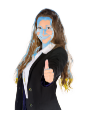

In [11]:
#compare performance of all keying methods that use the luminance by testing four pictures
#
# picture sources:
# https://www.publicdomainpictures.net/en/view-image.php?image=283138&picture=businesswoman-with-thumbs-up
# https://www.publicdomainpictures.net/en/view-image.php?image=363288&picture=woman-with-a-remote-control
# https://www.publicdomainpictures.net/en/view-image.php?image=283134&picture=businesswoman-with-thumbs-up
# https://www.publicdomainpictures.net/en/view-image.php?image=309804&picture=christmas-businessman
#
# background: 
# https://unsplash.com/photos/fJQSCxB18wE

import numpy as np
import datetime, time
import sys
import cv2
import matplotlib.pyplot as plt
import dis


#load test-images and ideal results
whitebg1 = cv2.imread("tests/testpicture1whitebg.png")
blackbg1 = cv2.imread("tests/testpicture1blackbg.png")
result1 = cv2.imread("tests/testpicture1result.png")

whitebg2 = cv2.imread("tests/testpicture2whitebg.png")
blackbg2= cv2.imread("tests/testpicture2blackbg.png")
result2 = cv2.imread("tests/testpicture2result.png")

whitebg3 = cv2.imread("tests/testpicture3whitebg.png")
blackbg3 = cv2.imread("tests/testpicture3blackbg.png")
result3 = cv2.imread("tests/testpicture3result.png")

whitebg4 = cv2.imread("tests/testpicture4whitebg.png")
blackbg4 = cv2.imread("tests/testpicture4blackbg.png")
result4 = cv2.imread("tests/testpicture4result.png")



def LumaKeyTest(frame):
    return LumaKey(frame,100,180,10,10)
    
def LumaKeyv2Test(frame):
    return LumaKeyv2(frame,229)
    
def LumaKeyv3Test(frame):
    return LumaKeyv3(frame,245)




#put functions and images into lists
algorithmlist_luminance=[LumaKeyTest,LumaKeyv2Test,LumaKeyv3Test]
imagelist_white=[whitebg1,whitebg2,whitebg3,whitebg4]
imagelist_black=[blackbg1,blackbg2,blackbg3,blackbg4]

#iterate over every version of luma key
for keyingmethod in algorithmlist_luminance:
    
    print(keyingmethod.__name__, ":")
    
    #iterate over all 4 test-images
    for i in range (0, len(imagelist_white)):
        #set current input and expected output
        frame=imagelist_white[i]
        result=resultlist[i]
        
        #update shape
        width, height, channels = frame.shape
        
        #fit background to new shape
        alternate_background= alternate_background0[0:width,0:height]
        
        #reset variables
        saveframes=False
        framecounter=0
        framenumber=0  
        distances2=np.zeros((width,height,3), np.uint8)
        
    
        #make empty mask with same size as frame
        mask= np.zeros((width,height), np.uint8)
    
        #array that returns the result
        resultimage= np.zeros((width,height,3), np.uint8)

        #read current frame
        frame=keyingmethod(frame)
        
        #copy actual result and expected result to calculate outside of uint8
        framecopy= np.zeros((width,height,3))
        framecopy[:,:,:]=frame[:,:,:]
        resultcopy= np.zeros((width,height,3))
        resultcopy[:,:,:]=result[:,:,:]
        
        #save difference of color of every pixel to expected color
        dif=abs(framecopy-resultcopy)
        
        #plot result
        plt.subplot(1, 4, i+1)
        plot = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        plt.axis('off')
        
        #calculate mean of dif
        meanframe=np.mean(dif)
        
        correct_pixels_tolerance=3
        correct_pixels_matrix=np.where(dif<=correct_pixels_tolerance,1,0)
        correct_pixels=np.sum(correct_pixels_matrix)
        correct_pixels_percent= (correct_pixels/(width*height*3))*100 
        
        print("Using the ", keyingmethod.__name__, " method on picture", i+1, "results in an average pixel difference to the ideal result of", round(meanframe,2), "and ",round(correct_pixels_percent,2), "% pixels that could be keyed correctly" )
    plt.show()#show all results of current method




In [ ]:
import numpy as np
import datetime, time
import sys
import cv2
import matplotlib.pyplot as plt
import dis










def TestFunction1Var(functionname,showprocess):
    
    
        #SET BACKGROUND
    #source:https://unsplash.com/photos/fJQSCxB18wE
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    #alternate_background= cv2.imread("white.png")
    height,width, channels = original1.shape



    saveframes=False
    framecounter=0
    distances2=np.zeros((height,width,3), np.uint8)

    framenumber=0

    #PARAMETERS AND ARRAYS ONLY USED FOR CHROMAV1B
    counter=2
    counterprev=1 
    #initialize array for saving current mean of all frames
    meanimage=np.zeros((height,width,3), np.uint8)
    framecopy=np.zeros((height,width,3))
    #make copy of meanimage for calculations outside of rgb color space
    meanimagecopy=np.zeros((height,width,3))
    #initialize meanimage with first frame
    meanimage=frame
    
    
    
    idealresult=255
    indealthreshold=1000
    for x in np.arange(0,255,5):
        dif=0
        if (showprocess):
            plt.title("Threshold:"+ str(x))
        for i in range (0, len(imagelist)):
    
            #frame4= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
            #set current input and expected output
            frame4=imagelist[i]
            result=resultlist[i]
    
    
    
            #shape of frame
            width, height, channels = frame4.shape
    
            alternate_background= alternate_background0[0:width,0:height]
    
            #make empty mask with same size as frame
            mask= np.zeros((width,height), np.uint8)
    
            #array that returns the result
            resultimage= np.zeros((width,height,3), np.uint8)
    
            #show original frame
            #cv2.imshow('original',frame4)
            frame5=functionname(frame4,x)
            dif+=np.mean(abs(frame5-result))
            if (showprocess):
                plt.subplot(1, 4, i+1)
                plot = plt.imshow(cv2.cvtColor(frame5, cv2.COLOR_RGB2BGR))
        
            plt.axis('off')
        if (showprocess):
            plt.show()
        dif=dif/4
        if (dif<idealresult):
                idealresult=dif
                idealthreshold=x      
        
    print("The ideal result for the " + functionname.__name__+" method is "+ str(idealresult)+ " on index "+str(idealthreshold))
    
    

    

    cv2.destroyAllWindows()
    
    
    
def TestFunction2Var(functionname,showprocess):
    
    #SET BACKGROUND
    #source:https://unsplash.com/photos/fJQSCxB18wE
    alternate_background= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    #alternate_background= cv2.imread("white.png")
    height,width, channels = original1.shape



    saveframes=False
    framecounter=0
    distances2=np.zeros((height,width,3), np.uint8)

    framenumber=0

    #PARAMETERS AND ARRAYS ONLY USED FOR CHROMAV1B
    counter=2
    counterprev=1 
    #initialize array for saving current mean of all frames
    meanimage=np.zeros((height,width,3), np.uint8)
    framecopy=np.zeros((height,width,3))
    #make copy of meanimage for calculations outside of rgb color space
    meanimagecopy=np.zeros((height,width,3))
    #initialize meanimage with first frame
    meanimage=frame
    
    
    
    idealresult=255
    idealthresholdx=1000
    idealthresholdy=1000
    for x in np.arange(0,255,5):
        for y in np.arange(x,255,5):
            dif=0
            if (showprocess):
                plt.title("Threshold-min:"+ str(x)+ "Threshold-max8"+str(y))
            for i in range (0, len(imagelist)):
                
                
                
                #frame4= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
                #set current input and expected output
                frame4=imagelist[i]
                
                #shape of frame
                width, height, channels = frame4.shape
                
                result=resultlist[i]
    
                alternate_background= alternate_background0[0:width,0:height]
    
                #make empty mask with same size as frame
                mask= np.zeros((width,height), np.uint8)
    
                #array that returns the result
                resultimage= np.zeros((width,height,3), np.uint8)
    
                #show original frame
                #cv2.imshow('original',frame4)
            
                frame5=functionname(frame4,x,y)
                dif+=np.mean(abs(frame5-result))
                if (showprocess):
                    plt.subplot(1, 4, i+1)
                    plot = plt.imshow(cv2.cvtColor(frame5, cv2.COLOR_RGB2BGR))
                    plt.axis('off')
                    
            if (showprocess):
                plt.show()
        dif=dif/4
        if (dif<idealresult):
            idealresult=dif
            idealthresholdx=x      
            idealthresholdy=y
        
    
    

    

    print("The ideal result for the " + functionname.__name__+" method is "+ str(idealresult)+ " on index "+str(idealthresholdx)+" "+str(idealthresholdy))
    
#TestFunction1Var(ChromaKeyVlahosv1,False)
#TestFunction2Var(ChromaKeyPlusDespill,False)
#TestFunction2Var(ChromaKeyPlusDespillv2,False)
TestFunction2Var(Chromav1a,False)
TestFunction1Var(Chromav1b,False)
TestFunction1Var(Chromav2,False)
TestFunction1Var(Chromav3,False)
TestFunction2Var(ColorKey,False)
TestFunction1Var(LumaKeyv2,False)
TestFunction1Var(LumaKeyv3,False)


#frame4=ChromaKeyVlahosv2(frame4,1.5,0.5,0)
    
    
#TestFunction2Var(LumaKeyTester,True)    
#frame4=ColorKeyv2(frame4)
#frame4=LumaKey(frame4,100,180,10,10)
    

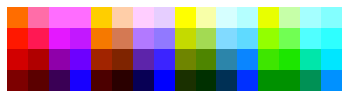

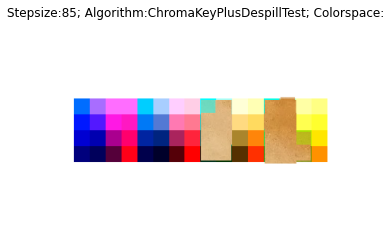

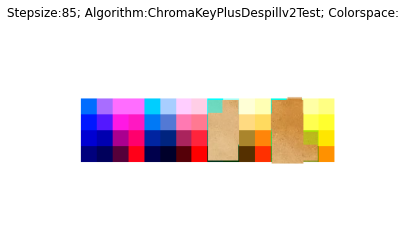

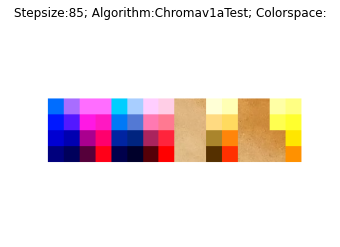

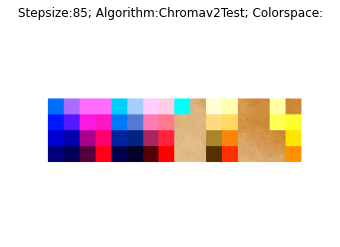

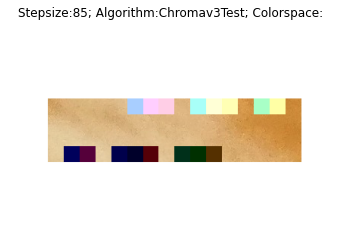

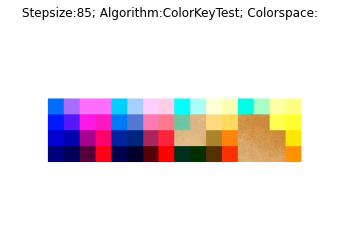

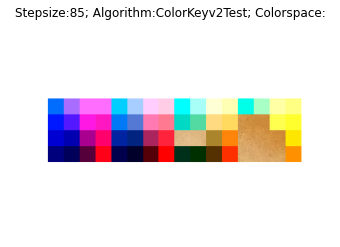

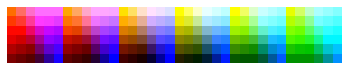

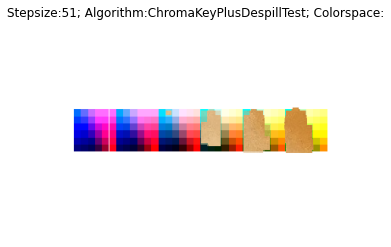

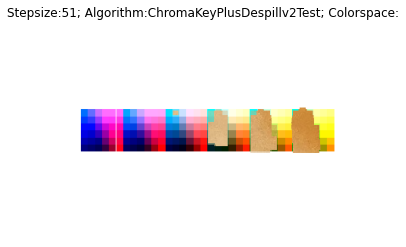

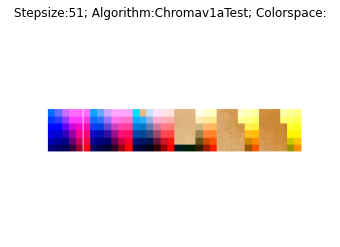

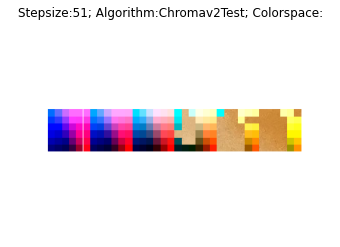

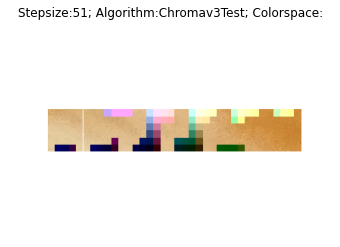

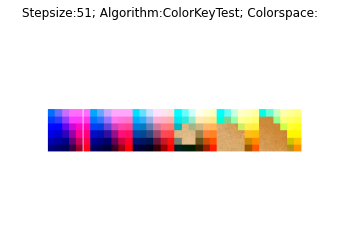

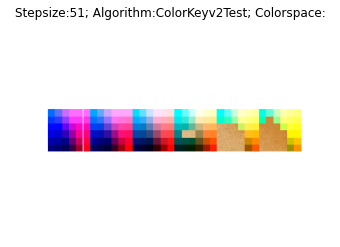

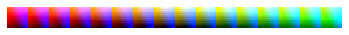

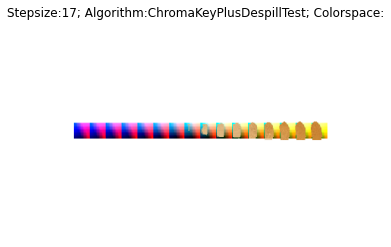

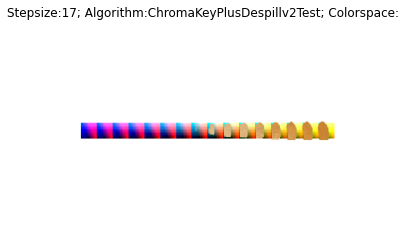

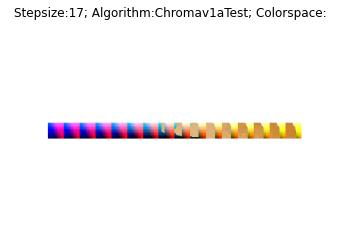

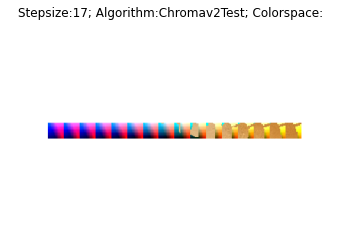

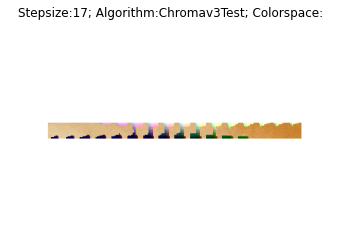

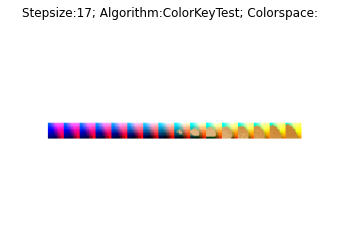

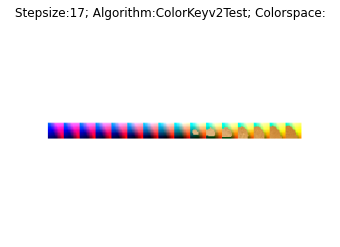

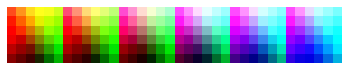

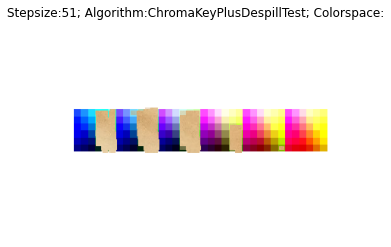

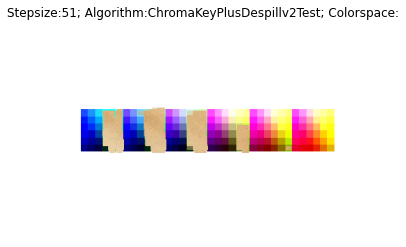

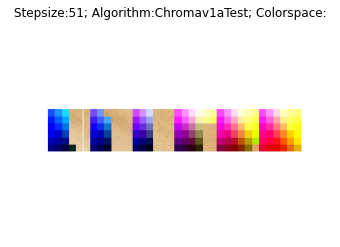

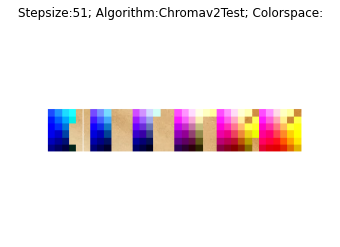

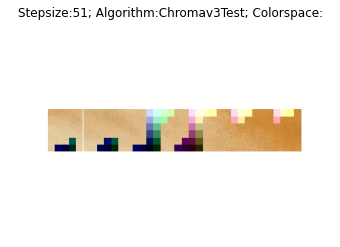

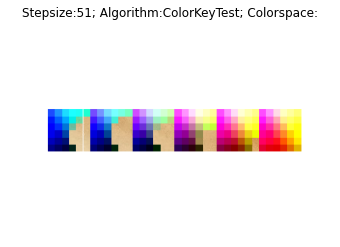

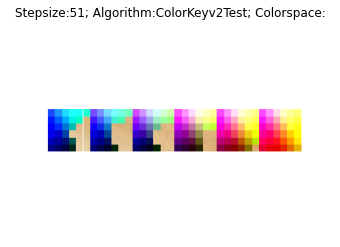

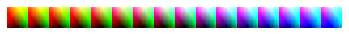

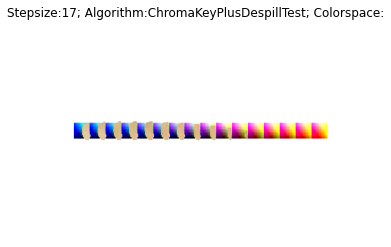

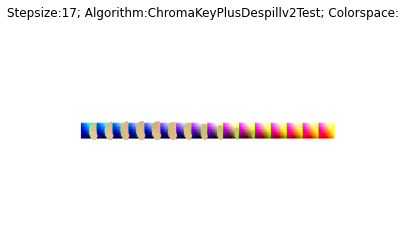

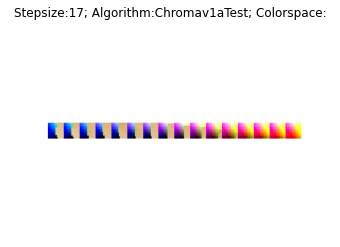

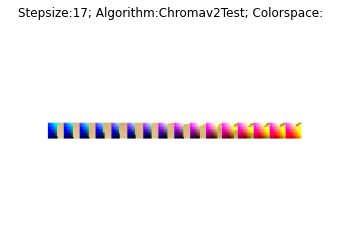

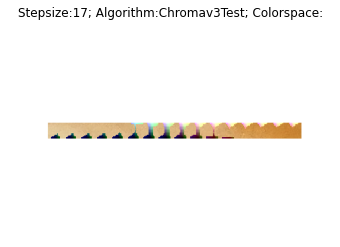

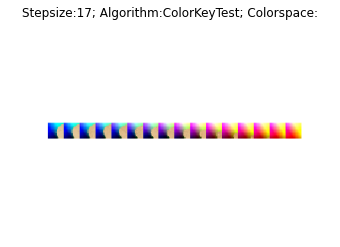

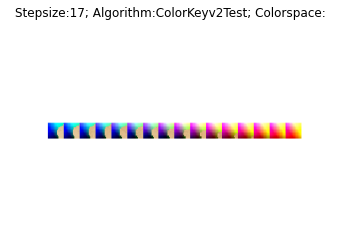

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

algorithmlist=[ChromaKeyPlusDespillTest,ChromaKeyPlusDespillv2Test,Chromav1aTest,Chromav2Test,Chromav3Test,ColorKeyTest,ColorKeyv2Test]


def ColorGrid(step,colormodel):
    #SET BACKGROUND
    #source:https://unsplash.com/photos/fJQSCxB18wE
    alternate_background0= cv2.imread("tests/vitaliy-gavrushchenko-fJQSCxB18wE-unsplash-3.jpg")
    #alternate_background= cv2.imread("white.png")
    height,width, channels = original1.shape



    saveframes=False
    framecounter=0
    distances2=np.zeros((height,width,3), np.uint8)

    framenumber=0

    #PARAMETERS AND ARRAYS ONLY USED FOR CHROMAV1B
    counter=2
    counterprev=1 
    #initialize array for saving current mean of all frames
    meanimage=np.zeros((height,width,3), np.uint8)
    framecopy=np.zeros((height,width,3))
    #make copy of meanimage for calculations outside of rgb color space
    meanimagecopy=np.zeros((height,width,3))
    #initialize meanimage with first frame
    meanimage=frame
    
    
    
    fig, ax = plt.subplots()
    ax.plot([0,0],[0,0])
    
    
    
    for i in np.arange(0,256,step):
        for j in np.arange(0,256,step):
            for k in np.arange(0,256,step):
                color=np.zeros((1,1,3), np.uint8)
                color[0,0]=np.array([j,i,k])
                color2=cv2.cvtColor(color, colormodel)
                ax.add_patch(patches.Rectangle((((255/step)+1)*(k/step)+(i/step),j/step),1,1,facecolor = (color2[0,0,1]/255,color2[0,0,0]/255,color2[0,0,2]/255),fill=True      ) )
    ax.axis('image')
    ax.axis('off')
    ax.set(xlim=(0,((255/step)+1)**2), ylim=(0,((255/step)+1)))
    plt.show()
    fig.savefig("tests/"+str(step)+'-'+str(colormodel)+'.png', dpi=fig.dpi)
    
    
    
    frame4=cv2.imread("tests/"+str(step)+'-'+str(colormodel)+'.png')
        
    width, height, channels = frame4.shape
        
    #fit background to new shape
    alternate_background= alternate_background0[0:width,0:height]
        
    #reset variables
    saveframes=False
    framecounter=0
    framenumber=0  
    distances2=np.zeros((width,height,3), np.uint8)
        
    
    #make empty mask with same size as frame
    mask= np.zeros((width,height), np.uint8)
    
    #array that returns the result
    resultimage= np.zeros((width,height,3), np.uint8)
    
    
    for keyingmethod in algorithmlist:
        #read current frame
        plt.imshow(keyingmethod(frame4))
        plt.title('Stepsize:'+ str(step)+ '; Algorithm:'+str(keyingmethod.__name__)+'; Colorspace:')
        plt.axis('image')
        plt.axis('off')
        plt.show()
    
    
    

ColorGrid(85,cv2.COLOR_YUV2RGB)
ColorGrid(51,cv2.COLOR_YUV2RGB)
ColorGrid(17,cv2.COLOR_YUV2RGB)
ColorGrid(51,cv2.COLOR_YCrCb2RGB)
ColorGrid(17,cv2.COLOR_YCrCb2RGB)
